In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [4]:
import pip
pip.main(["install", "matplotlib"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [7]:
print(tf. __version__)

2.3.0


In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
len(train_labels)

60000

In [13]:
(train_labels)

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

In [17]:
import matplotlib.pyplot as plt

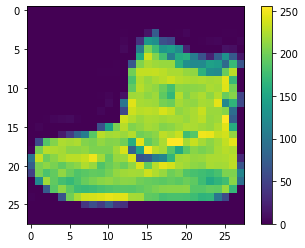

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [19]:
train_images =train_images /255.0

In [20]:
test_images = test_images / 255.0

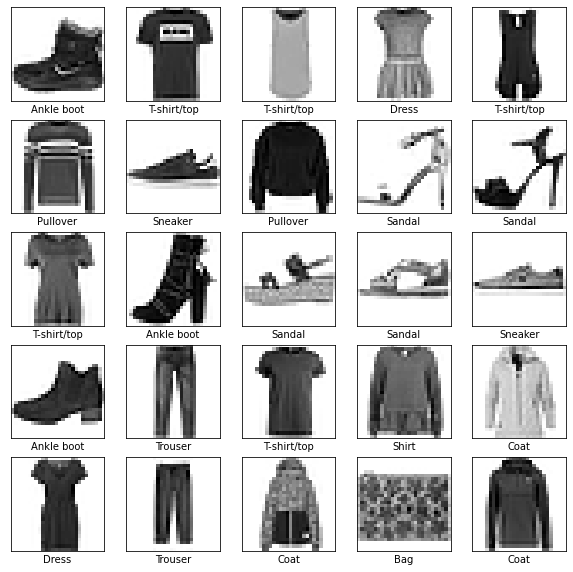

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [23]:
model.compile(optimizer = 'adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4928 - accuracy: 0.8268
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3712 - accuracy: 0.8670
Epoch 3/10
1875/1875 [==============================] - 2s 966us/step - loss: 0.3346 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3117 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2941 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2792 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2678 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2569 - accuracy: 0.9039
Epoch 9/10
1875/1875 [==============================] - 2s 964us/step - loss: 0.2476 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 2s 974us/step - loss:

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 0.3405 - accuracy: 0.8823


In [27]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8823000192642212


In [28]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(test_images)

In [30]:
predictions[0]

array([4.4853505e-07, 1.6946013e-10, 7.5517564e-11, 5.7992840e-11,
       9.6673225e-11, 3.1987031e-04, 3.9255121e-07, 5.1800786e-03,
       2.4673358e-08, 9.9449921e-01], dtype=float32)

In [31]:
np.argmax(predictions[0])

9

In [32]:
test_labels[0]

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

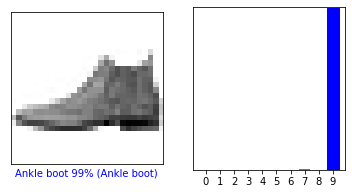

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

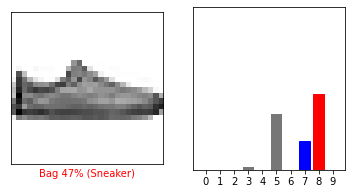

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

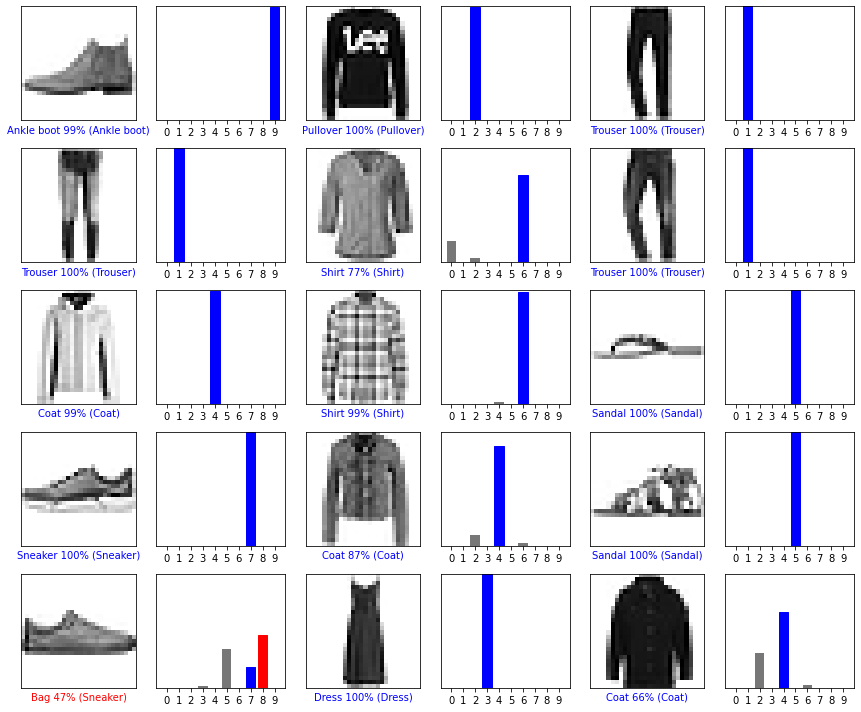

In [36]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [37]:
img = test_images[1]

In [38]:
print(img.shape)

(28, 28)


In [39]:
img = (np.expand_dims(img, 0))

In [40]:
print(img.shape)

(1, 28, 28)


In [41]:
predictions_single = probability_model.predict(img)


In [42]:
print(predictions_single)

[[1.2128239e-05 5.2634824e-14 9.9796790e-01 6.8935191e-10 1.8286780e-03
  8.2388720e-14 1.9135443e-04 1.6974102e-18 3.9216497e-09 5.4344180e-14]]


([<matplotlib.axis.XTick at 0x1734d788d60>,
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')])

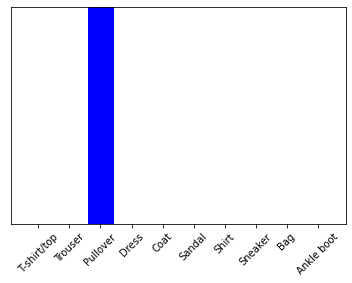

In [45]:
plot_value_array(1, predictions_single[0], test_labels)
plt.xticks(range(10), class_names, rotation=45)

In [46]:
np.argmax(predictions_single[0])

2